# Magnitude spectrun of a FFT of a sine wave

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib widget

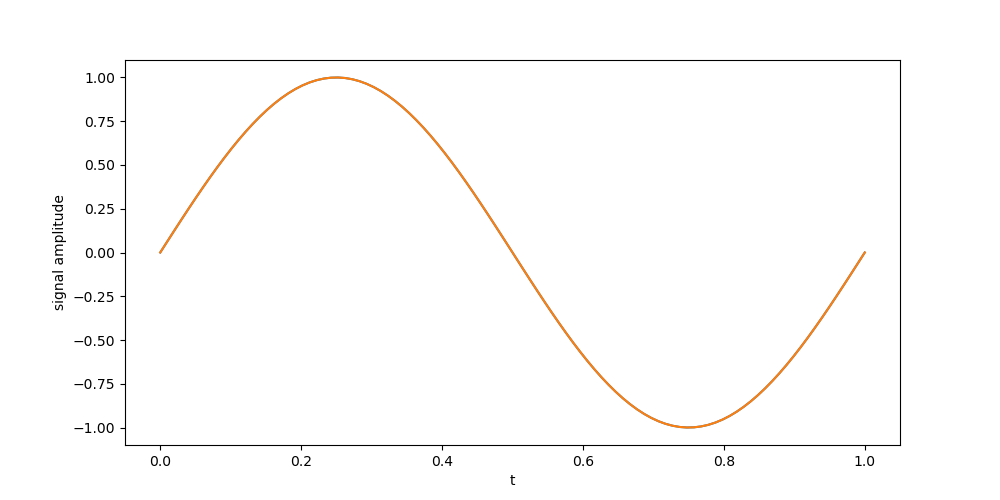

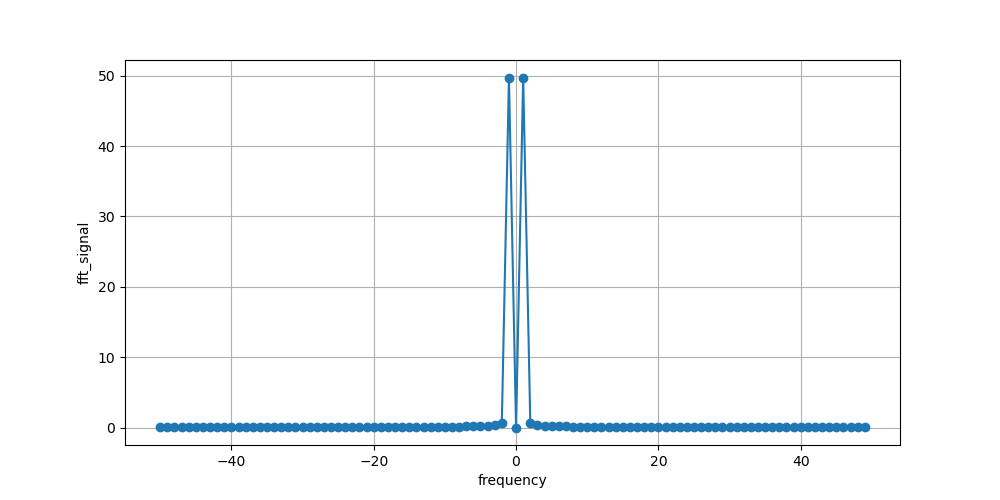

In [7]:
f = 1.0 # xt frequency
sampling_freq = 100 
t = np.linspace(0, 1, num=sampling_freq) # time intervals
xt = np.sin(2*np.pi*t*f) #xt is x(t) which is the sin signal

plt.figure('Sin Wave', figsize=(10,5))
plt.plot(t, xt)
plt.xlabel('t')
plt.ylabel('signal amplitude')

plt.grid()
plt.show()

# np.fft.fft(xt)) gives the FFT of the signal. The result is a complex array with both magnitude and phase
# np.abs(...) gives only the magnitude which represents the amplitude of the signal
# np.fft.fftshift(...) Shifts the zero-frequency component to the center of the spectrum for better visualization.
fft_signal = np.fft.fftshift(np.abs(np.fft.fft(xt)))
#visualizing the frequency components of the signal using a centered frequency axis.  
xax = np.arange(-np.int64(sampling_freq/2),np.int64(sampling_freq/2)) 

plt.figure('Magnitude Spectrum', figsize=(10,5))
plt.plot(xax, fft_signal,'o-')
plt.xlabel('frequency')
plt.ylabel('fft_signal')

plt.grid()
plt.show()

# PSD analysis 

PSD measures the power distribution of a signal per unit frequency. \
It is given by: $PSD= \frac{∣FFT(signal)∣^2}{N}$ where $N$ is the number of samples. 

PSD focuses on power (proportional to the square of the magnitude) rather than amplitude.

Text(0, 0.5, 'Power')

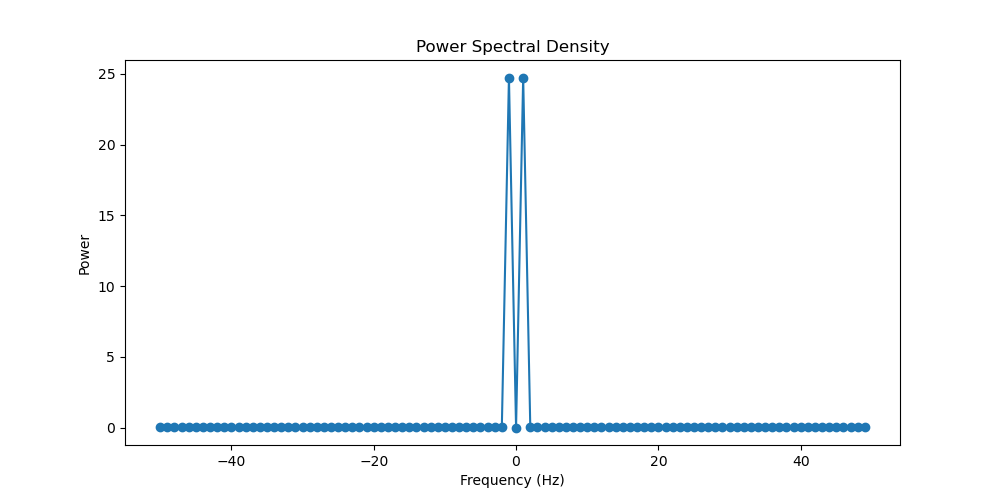

In [3]:
# Compute the Power Spectral Density (PSD)
psd_signal = (np.abs(np.fft.fft(xt)) ** 2) / sampling_freq

# Shift the PSD for centered visualization
psd_signal = np.fft.fftshift(psd_signal)

# Frequency axis remains the same
plt.figure(figsize=(10,5))
plt.plot(xax, psd_signal, 'o-')
plt.title('Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')

# Magnitude Spectrum of a FFT of the sin wave with noise

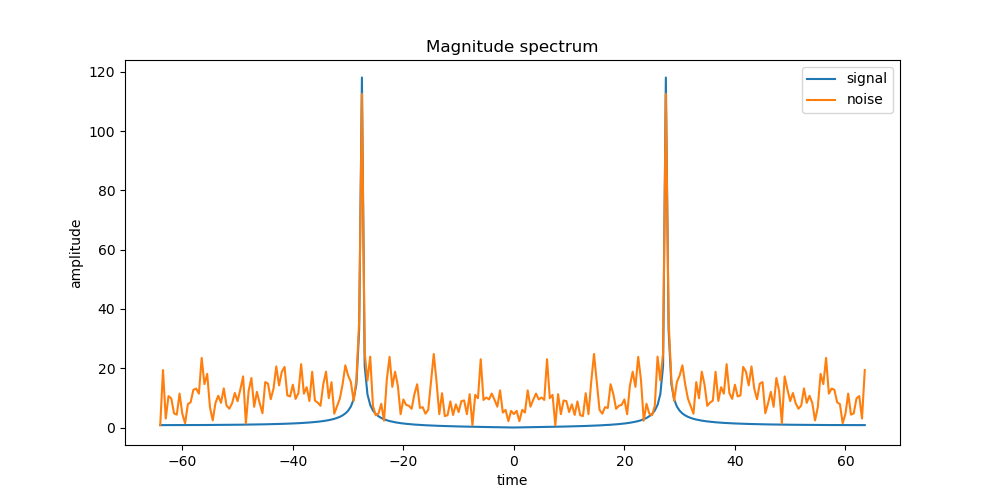

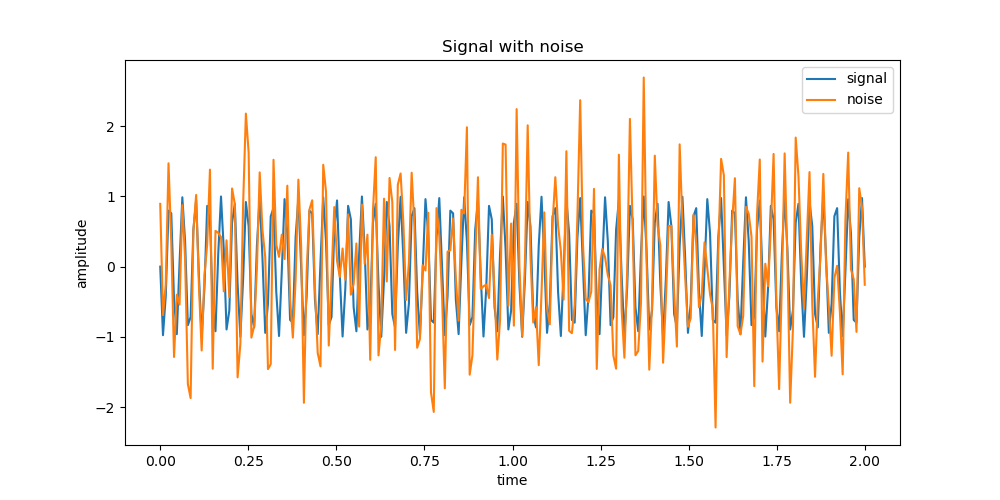

In [4]:
f = 100
sampling_freq = 128
sampling_rate = 1/sampling_freq # sampling rate
nyquist_rate = 256 
snr_db = 0; # target SNR in dB. 
# 0 SNR means the signal and noise have the same intensity.
# +ve SNR means the intensity of the signal is higher than the noise
# -ve SNR means the intensity of the signal is lower than the noise
t = np.linspace(0, nyquist_rate*sampling_rate, nyquist_rate)
xt = np.sin(2*np.pi*f*t)
sig_fft = np.fft.fftshift(np.abs(np.fft.fft(xt)))
x_freq = np.arange(-np.int64(nyquist_rate/2),np.int64(nyquist_rate/2))*sampling_freq/nyquist_rate

mean_pow_db = 10*np.log10(np.mean(xt**2))
noise_db = mean_pow_db - snr_db # noise power in dB
noise_lin_amp = 10**(noise_db/20); # noise in linear scale (to voltage or amplitude scale)
mean_pow_db = 10*np.log10(np.mean(xt**2))
noise_samps = np.random.normal(0,noise_lin_amp,len(xt))

sig_n = xt + noise_samps
sig_fftn = np.fft.fftshift(np.abs(np.fft.fft(sig_n)))

plt.figure(figsize=(10,5))
plt.title('Signal with noise')
plt.plot(t, xt, label='signal')
plt.plot(t, sig_n, label='noise')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()

plt.figure(figsize=(10,5))
plt.title('Magnitude spectrum')
plt.plot(x_freq, sig_fft, label = 'signal')
plt.plot(x_freq, sig_fftn, label='noise')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.legend()

plt.show()